#Задача 1: вывести 4 графика со следующими данными:
1. распредерение количества вызовов по годам
2. распределение количества вызовов по месяцам 
3. распределение по месяцам ввиде столбцов
4. распреденение по районам ввиде долей от общего количества вызовов в МСК

## Подключение библиотек и загрузка данных

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as stats
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv", delimiter=";")





## Построение первого графика.

###Подготовка данных:
1. приведем месяца в верхний регистр и сократим до 3х символов
2. районы разбиваем по  ' '  отбрасываем " административный округ"
3. производим группировку по году и берем средние значения


In [3]:
data["Month"] = data["Month"].str.slice(0,3).str.upper()
data["AdmArea"] = data["AdmArea"].apply(lambda x: x.split(" ")[0])
years = data.groupby("Year").mean()["Calls"].round()
pd.DataFrame(years)

,Calls
Year,
2015,427.0
2016,423.0
2017,458.0
2018,599.0
2019,580.0


### Построение графика 

1. задаем 'холст' размером 32х8(примерно 1600х400 пикселей)
2. Создаем на холсте 1/4 зону на которой будет график. Холст разбиваем на 4 зоны
3. Добавим легенду 
4. Сконвертируем индексы и года

([<matplotlib.axis.XTick at 0x7fcf8dc98150>,
 <a list of 5 Text major ticklabel objects>)

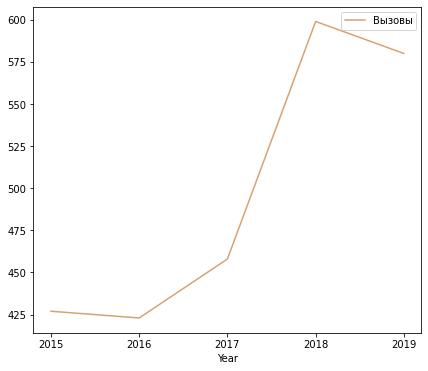

In [4]:
fig = plt.figure(figsize = (32,6))
area = fig.add_subplot(1, 4, 1)
years.plot.line(ax=area, label="Вызовы",color="#d4a373")
area.legend()
plt.xticks(years.index)


## Построение 2 графика 

Выбираем 2/4 зону
Данные группируем по месяцам
Поскольку данные в таблице сгруппировались не по порядку поменяем их порядок
чтобы отцентровать индексы и вывести точное значение вызовов в месяц используем цикл в котором методом annotate() выведем округленные значения.

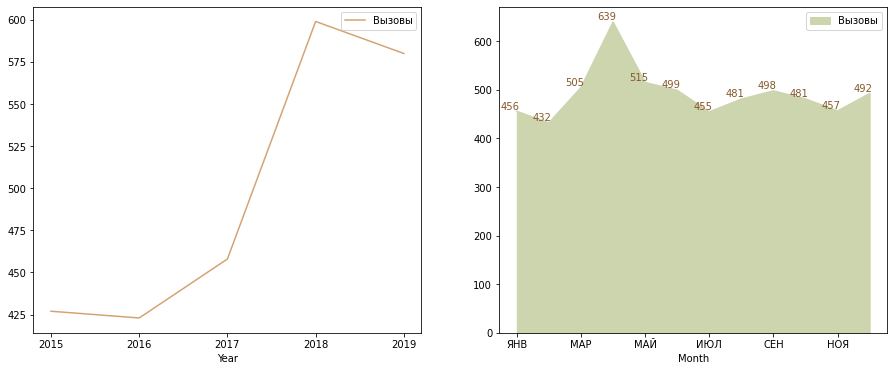

In [5]:
fig = plt.figure(figsize = (32,6))
area = fig.add_subplot(1, 4, 1)
years.plot.line(ax=area, label="Вызовы",color="#d4a373")
area.legend()
plt.xticks(years.index)
#Предыдущий код (до этой строки скопирован из предыдущего блока)
area = fig.add_subplot(1, 4, 2)
monthes = data.groupby("Month").mean()["Calls"]
monthes = monthes.reindex(["ЯНВ","ФЕВ","МАР","АПР","МАЙ","ИЮН","ИЮЛ","АВГ","СЕН","ОКТ","НОЯ","ДЕК"])
monthes.plot.area(ax=area, label="Вызовы", color="#ccd5ae")
area.legend()
j = 0
for i in monthes:
    area.annotate(round(i), xy=(j-0.5,i*1.01) ,color="#855729")
    j += 1
plt.show()

## Построение 3го графика

Выбираем 3/4 часть холста и строим там 3 график. 
в параметрах указываем название и цветовую схему

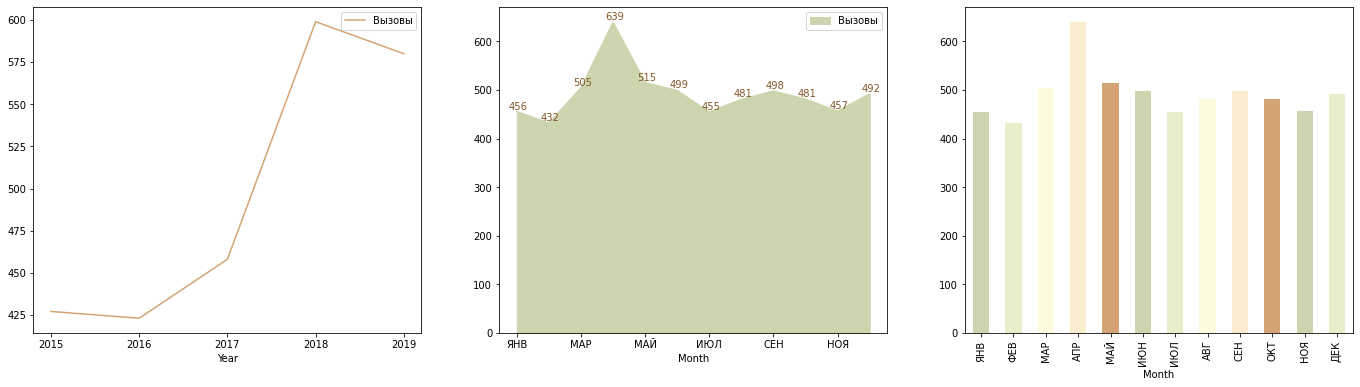

In [6]:
fig = plt.figure(figsize = (32,6))
area = fig.add_subplot(1, 4, 1)
years.plot.line(ax=area, label="Вызовы",color="#d4a373")
area.legend()
plt.xticks(years.index)
area = fig.add_subplot(1, 4, 2)
monthes = data.groupby("Month").mean()["Calls"]
monthes = monthes.reindex(["ЯНВ","ФЕВ","МАР","АПР","МАЙ","ИЮН","ИЮЛ","АВГ","СЕН","ОКТ","НОЯ","ДЕК"])
monthes.plot.area(ax=area, label="Вызовы", color="#ccd5ae")
area.legend()
j = 0
for i in monthes:
    area.annotate(round(i), xy=(j-0.25,i*1.01) ,color="#855729")
    j += 1
    
#Предыдущий код (до этой строки скопирован из предыдущего блока)
area = fig.add_subplot(1, 4, 3)
# coolors.co
monthes.plot.bar(ax=area, label="График 3", color=["#ccd5ae", "#e9edc9", "#fefae0", "#faedcd", "#d4a373"])
plt.show()


## Построение 4 график 

Выбираем 4/4 зону и строим в ней график. Изменим размер холста чтобы все графики помещались на экране.
1. Данные сгрупперуем по административным округам отфильтровав те, в которых меньше 2х записей
2. После фильтрации мы получим фрейм данных его нужно заново сгруппировать. Берем среднее значение.
3. Находим сумму всех вызовов по МСК. Чтобы доли содержали точное значение нормируем их относительно суммы используя autopct.
4. Строим круговую диаграмму

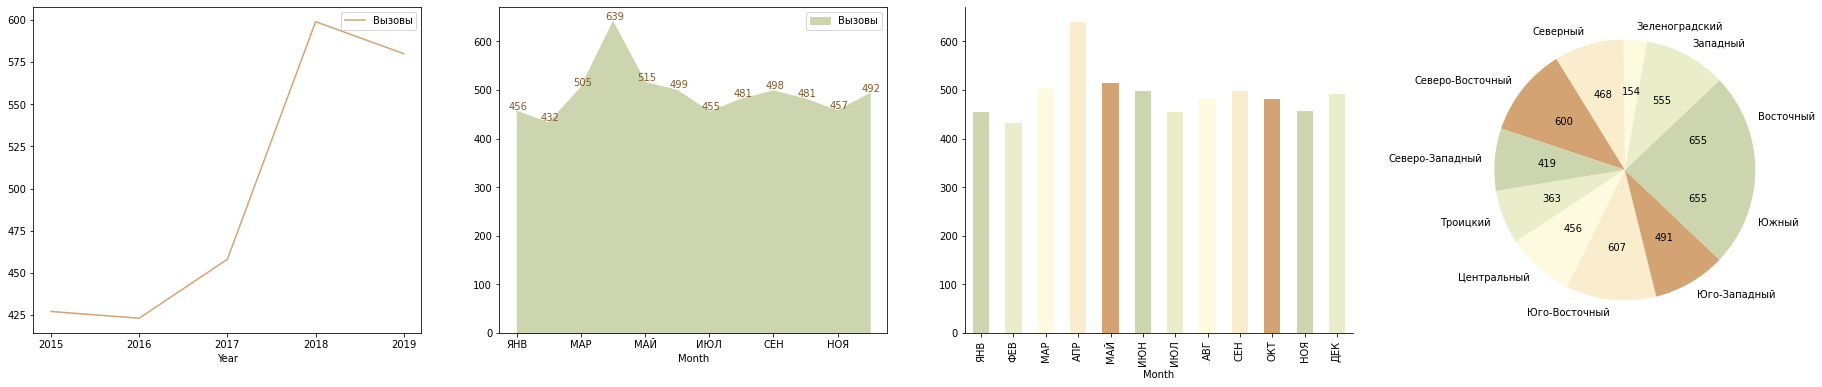

In [7]:
fig = plt.figure(figsize = (32,6))
area = fig.add_subplot(1, 4, 1)
years.plot.line(ax=area, label="Вызовы",color="#d4a373")
area.legend()
plt.xticks(years.index)
area = fig.add_subplot(1, 4, 2)
monthes = data.groupby("Month").mean()["Calls"]
monthes = monthes.reindex(["ЯНВ","ФЕВ","МАР","АПР","МАЙ","ИЮН","ИЮЛ","АВГ","СЕН","ОКТ","НОЯ","ДЕК"])
monthes.plot.area(ax=area, label="Вызовы", color="#ccd5ae")
area.legend()
j = 0
for i in monthes:
    area.annotate(round(i), xy=(j-0.25,i*1.01) ,color="#855729")
    j += 1   
area = fig.add_subplot(1, 4, 3)
# coolors.co
ax =monthes.plot.bar(ax=area, label="", color=["#ccd5ae", "#e9edc9", "#fefae0", "#faedcd", "#d4a373"])
ax.spines['top'].set_visible(False) # Уберет линии сбоку и сверху   
ax.spines['right'].set_visible(False)

#Предыдущий код (до этой строки скопирован из предыдущего блока)

area = fig.add_subplot(1, 4, 4)
adm = data.groupby("AdmArea").filter(lambda x:x["Calls"].count() > 2)
adm = adm.groupby("AdmArea").mean()["Calls"]
total = sum(adm)
adm.plot.pie(ax=area, label="",colors=["#ccd5ae", "#e9edc9", "#fefae0", "#faedcd", "#d4a373"], autopct=lambda x: int(total * x/100))
plt.show()

# Задача 2 визуализация зависимостей

Не создавая холсn  на основе данных о числе отличников по округам в москве построить 3 графика :
1. Базовый график по всем результатам 
2. График улей по округам москвы 
3. График скрипка по округам

для всех графиков ниже создадим единый стиль через rcParams

In [8]:
rcParams['figure.figsize'] = 16,8 # размер графика 
rcParams['font.family']='serif' # выбор шрифта
rcParams['lines.markersize'] = 0.5 # размер маркеров
sns.set_context("paper", font_scale=2)  #размер шрифта 

In [9]:

data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])# в столбще округ оставим только первое слово

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


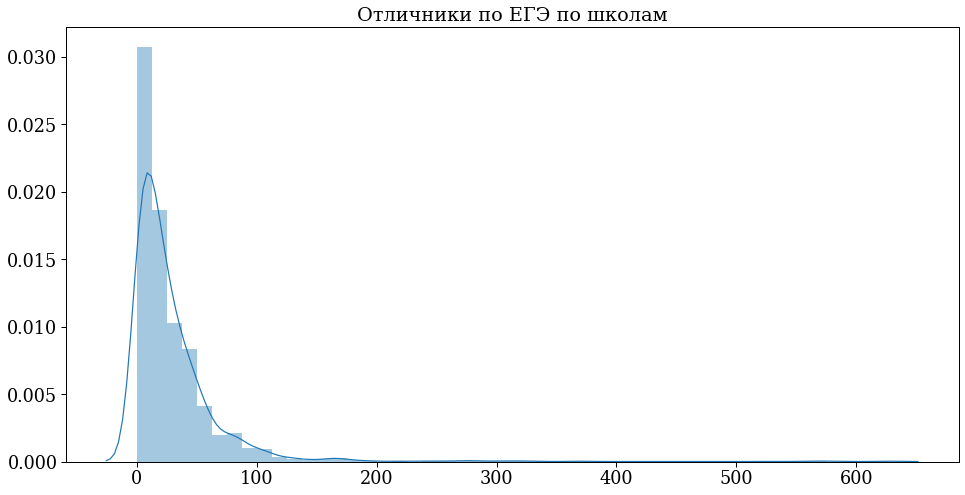

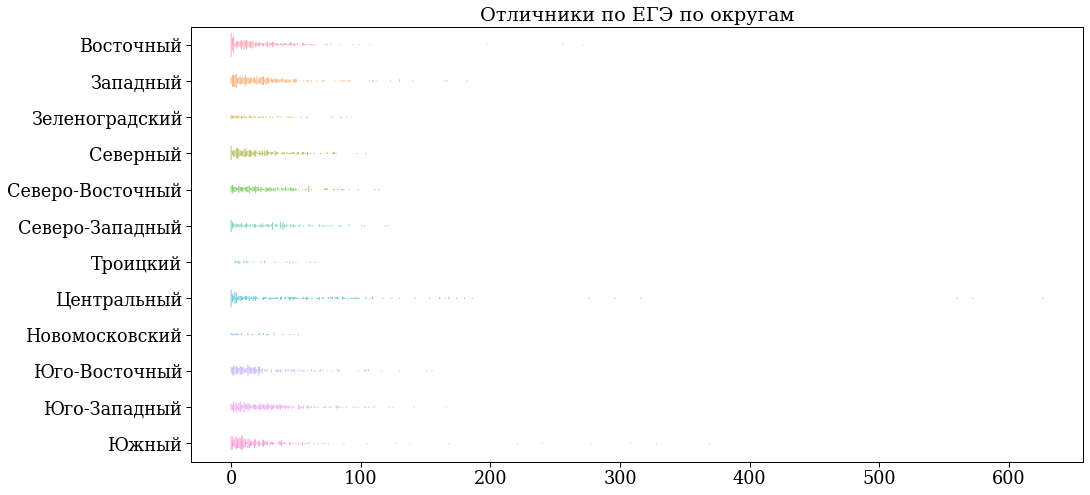

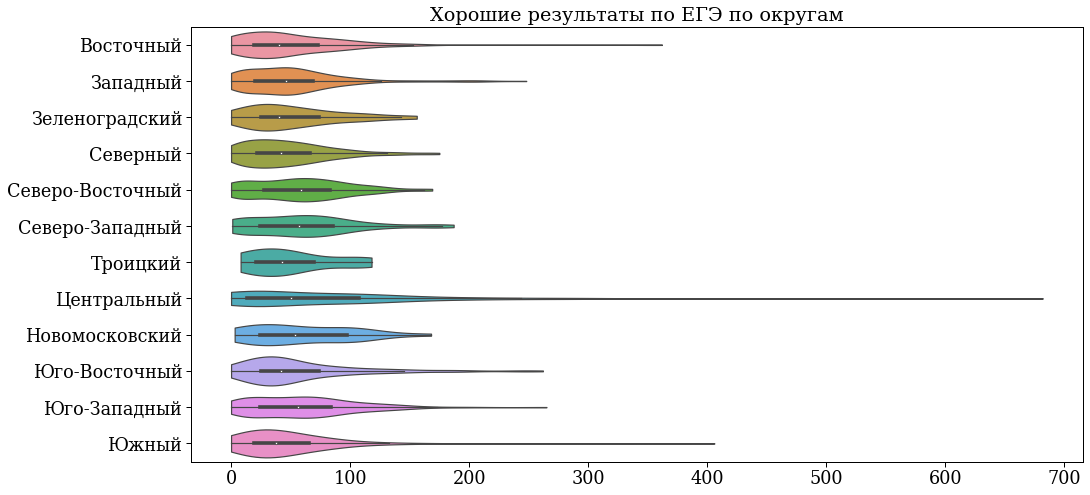

In [10]:

# базовый график по всем результатам по ЕГЭ
sns.distplot( data["PASSES_OVER_220"]).set(xlabel='', ylabel='', title="Отличники по ЕГЭ по школам")# set выставляет все дополнительные параметры
plt.show()
# график улей по округам москвы 
sns.swarmplot(x="PASSES_OVER_220", y="AdmArea", data=data,  size = 1 ).set(xlabel='', ylabel='', title="Отличники по ЕГЭ по округам")
plt.show()
# график скрипка по округам 
sns.violinplot(x="PASSER_UNDER_160", y="AdmArea", data=data, cut=0)# сut отсекает результаты по нулю. доп. параметры выставим не черег set а через обьект matplotlib
plt.xlabel('')
plt.ylabel('')
plt.title('Хорошие результаты по ЕГЭ по округам')
plt.show()

# Задача 3 графики регрессий. 

на основе данных 2й задачи определить школу лидера в результатах ЕГЭ

## подготовим данные:
1. заново загрузим данные 
2. уберем из abmarea "Административный огруг" оставив только кк название
3. уберем из "District" слово "район"
4. сократим названия школ до 1 слова и уберем "»"

In [11]:
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])
data["District"] = data["District"].str.replace(" район","")
data["EDU_NAME_TITLE"] = data["EDU_NAME"].apply(lambda x:x.split(" ")[-1].replace("»",""))

зададим размер холста 12х12 ( примерно 600 на 600 точек ) и увеличим размер шрифта

In [12]:
rcParams['figure.figsize'] = 12,12
sns.set_context('paper', font_scale=2)
data


,ID,EDU_NAME,global_id,YEAR,AdmArea,District,PASSES_OVER_220,PASSER_UNDER_160,Unnamed: 8,EDU_NAME_TITLE
0,8236,Государственное бюджетное общеобразовательное ...,797946035,2016-2017,Восточный,район Богородское,5,19,NaN,Батова
1,8237,Государственное казенное общеобразовательное у...,797949150,2016-2017,Восточный,район Богородское,14,47,NaN,корпус
2,8238,Государственное казенное общеобразовательное у...,797949275,2016-2017,Восточный,район Вешняки,0,1,NaN,31
3,8239,Частное учреждение общеобразовательная организ...,797949425,2016-2017,Восточный,район Вешняки,0,6,NaN,«Планета
4,8240,Автономная некоммерческая организация средняя ...,797949570,2016-2017,Восточный,район Восточное Измайлово,1,5,NaN,«Колибри
...,...,...,...,...,...,...,...,...,...,...
2181,10417,Государственное бюджетное профессиональное обр...,1011905753,2018-2019,Южный,Донской,1,2,NaN,киношкола
2182,10418,Государственное бюджетное общеобразовательное ...,1011905754,2018-2019,Южный,район Нагатинский Затон,4,29,NaN,514
2183,10419,Государственное бюджетное общеобразовательное ...,1011905755,2018-2019,Южный,Нагорный,6,26,NaN,2016
2184,10420,Государственное бюджетное общеобразовательное ...,1011905756,2018-2019,Южный,район Орехово-Борисово Северное,24,63,NaN,878


Построим серию графиков разбросов по группам данных используя sns.lmplot. Очевидно что школа лидер будет находиться в центральном АО

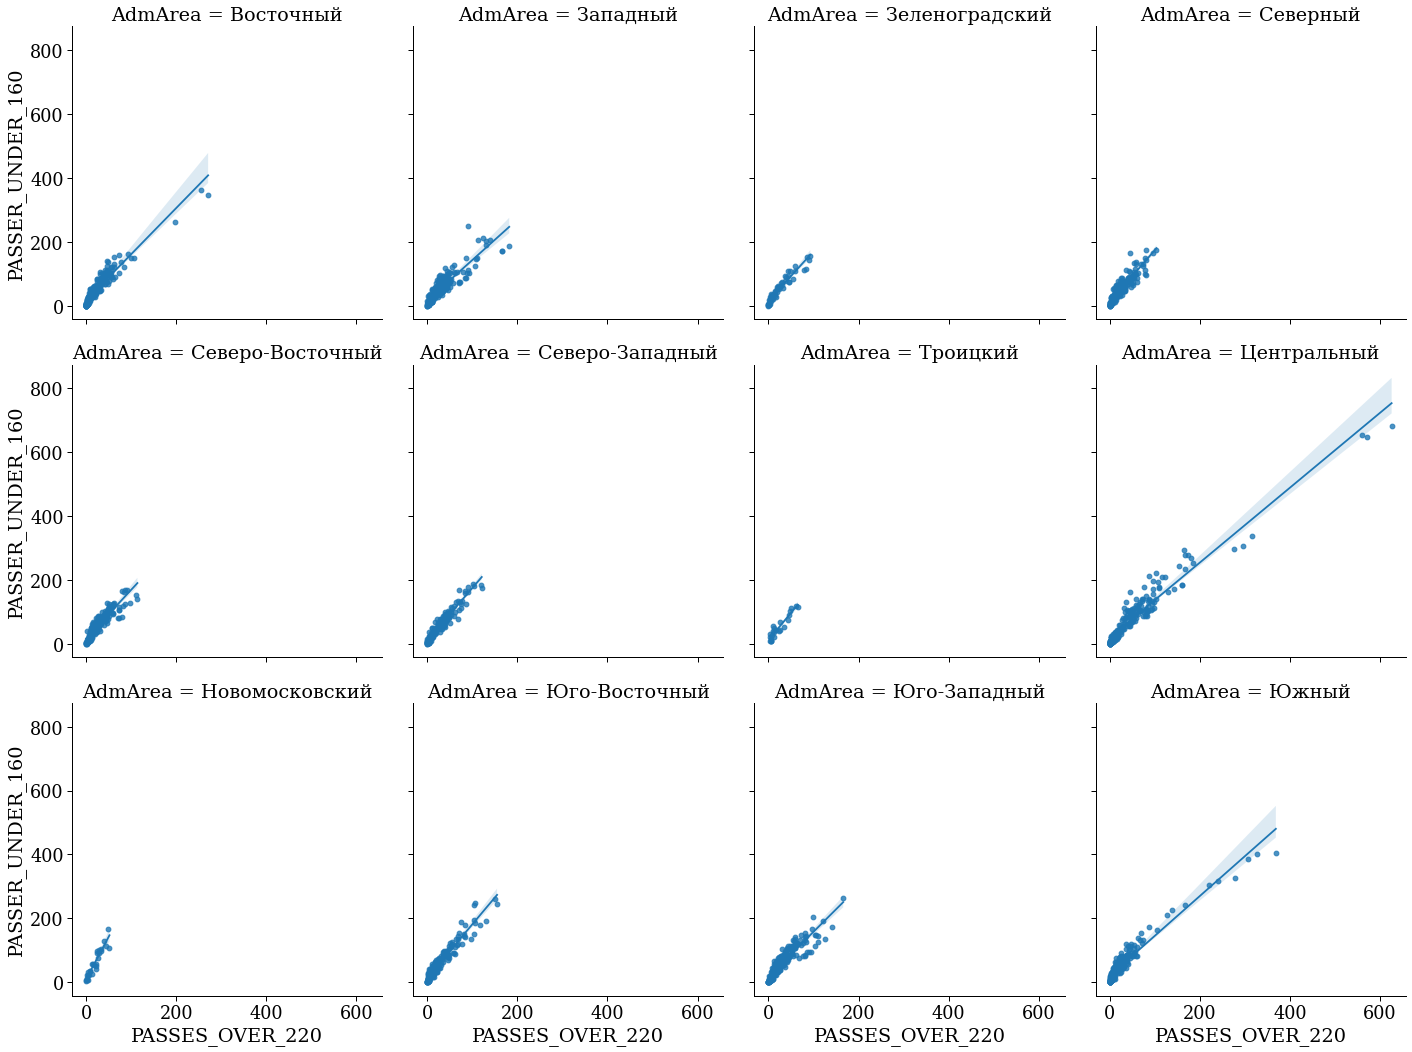

In [13]:
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data, col="AdmArea", col_wrap=4, truncate=True)
plt.show()

Построим серию уточняющий графиков по районам центрального АО. Из графиков видно что лидер находится в Басманном районе

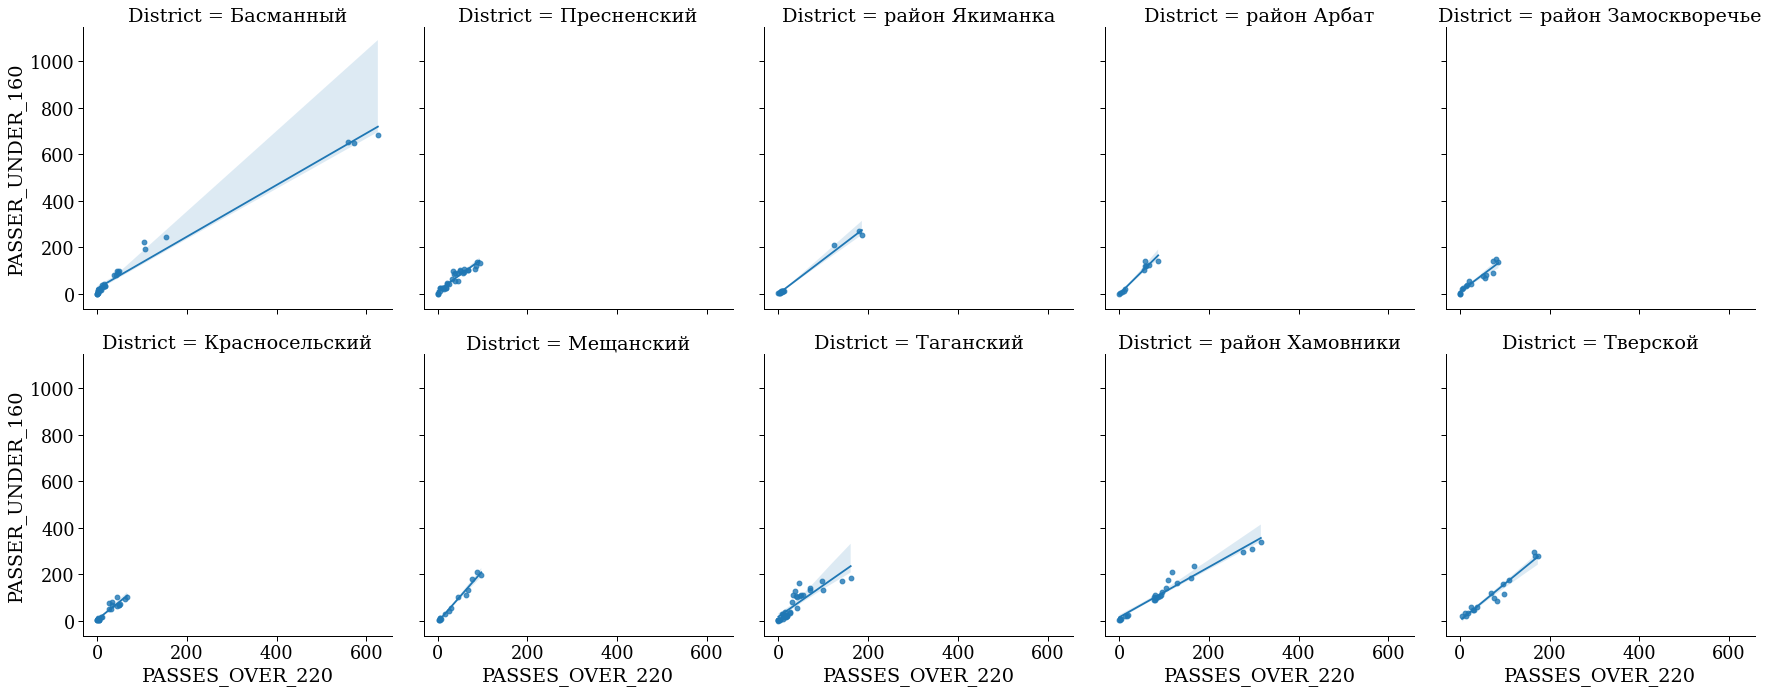

In [14]:
data1 = data.set_index("AdmArea").loc["Центральный"]
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data1, col="District", col_wrap=5, truncate=True)
plt.show()

построим серию уточняющий графиков по Басманному району. Школа лидер определена, однако нам потребуется уточнить ее название, так как для наглядности мы обрезали названия школ.

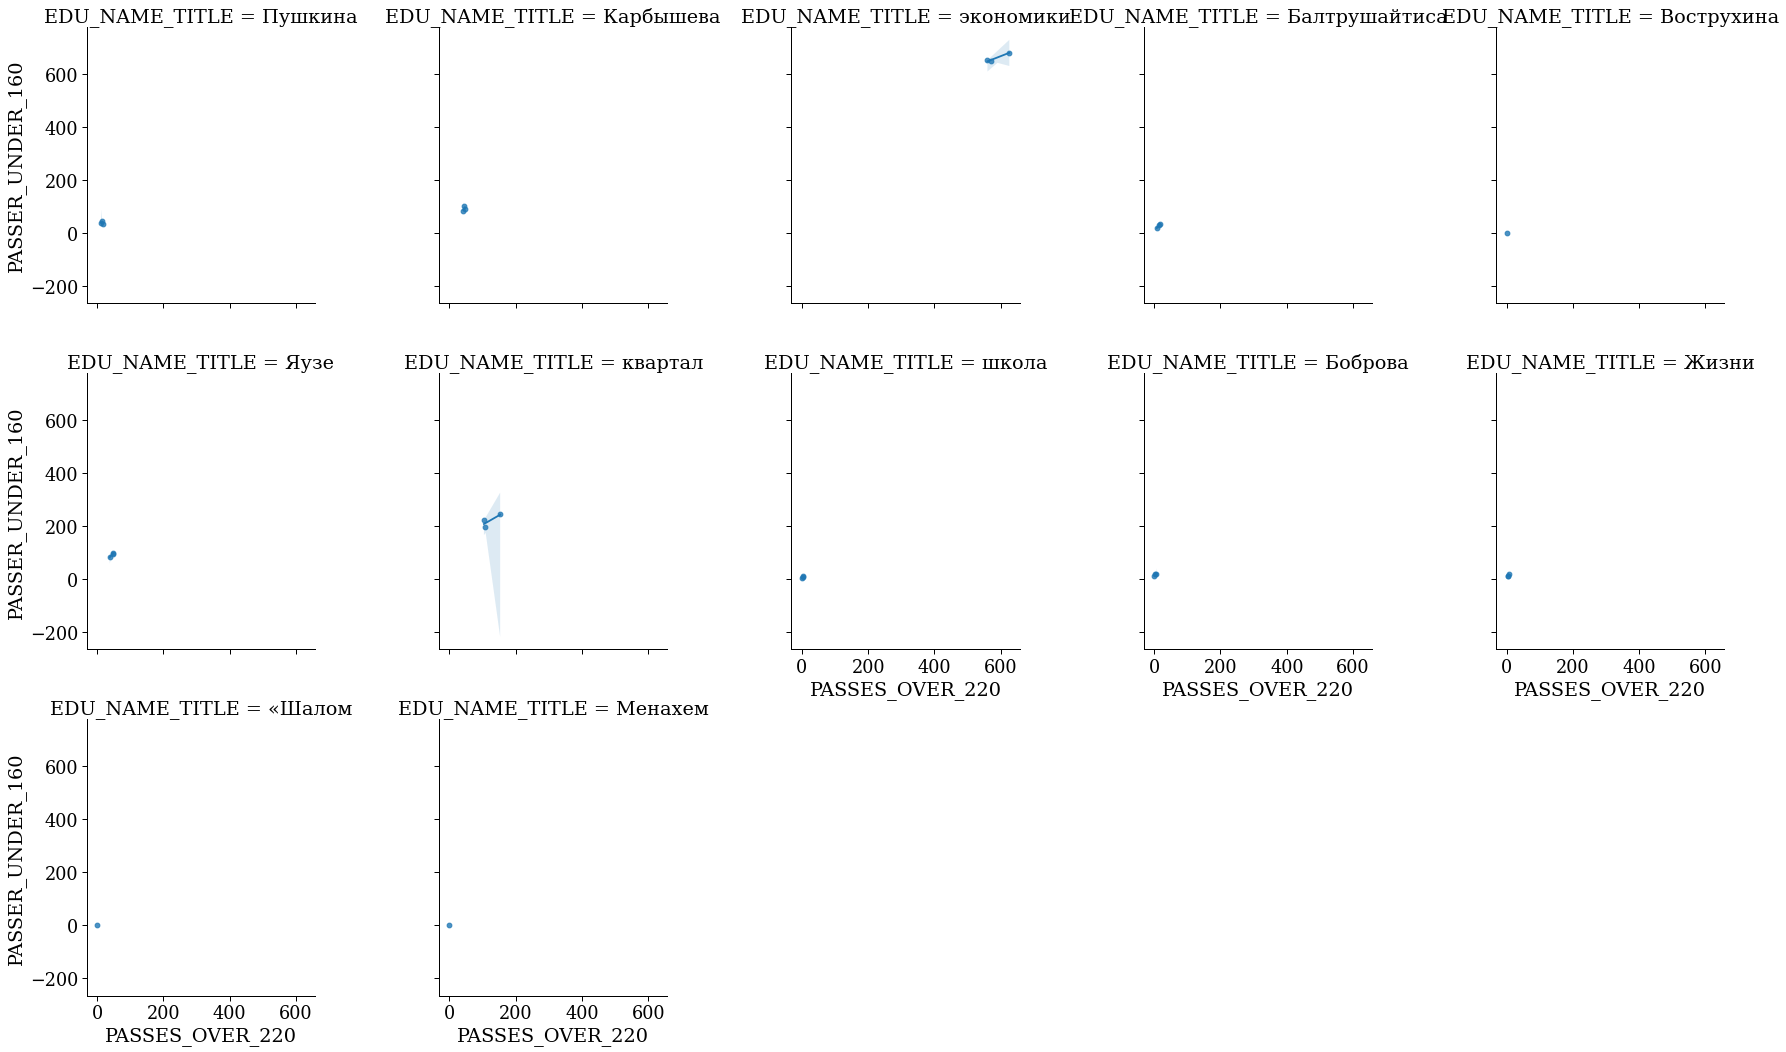

In [15]:
data2 = data1.set_index("District").loc["Басманный"]
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data2, col="EDU_NAME_TITLE", col_wrap=5, truncate=True)
plt.show()

найдем полное название школы из исходных данных

In [16]:
pd.options.display.max_colwidth = 1000
print ("Лидер :",data2.set_index('EDU_NAME_TITLE').loc["экономики"]["EDU_NAME"][0])

Лидер : Федеральное государственное автономное образовательное учреждение высшего «Национальный исследовательский университет «Высшая школа экономики». лицей «Национального исследовательского университета «Высшая школа экономики»


# Задача 4. Кореляционные диаграмы.
Опредилить достаточно ли высокая кореляция данных по хорошим и отличным результатам  сдачи ЕГЭ в МСК для использования линейной регрессии. Построить кореляционные диаграммы

Загрузим данные заново. сократим значение поля "AdmArea" до первого слова, и создадим фрейм который будет содержать отличные и полхие результаты по округам

In [17]:
sns.set_context("paper", font_scale=2)
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])


Находим данные каких серии данных коррелируют (используя диаграмму pairplot в Seaborn). Cоздадим датафрейм data1 в который объединим интересующие нас данные

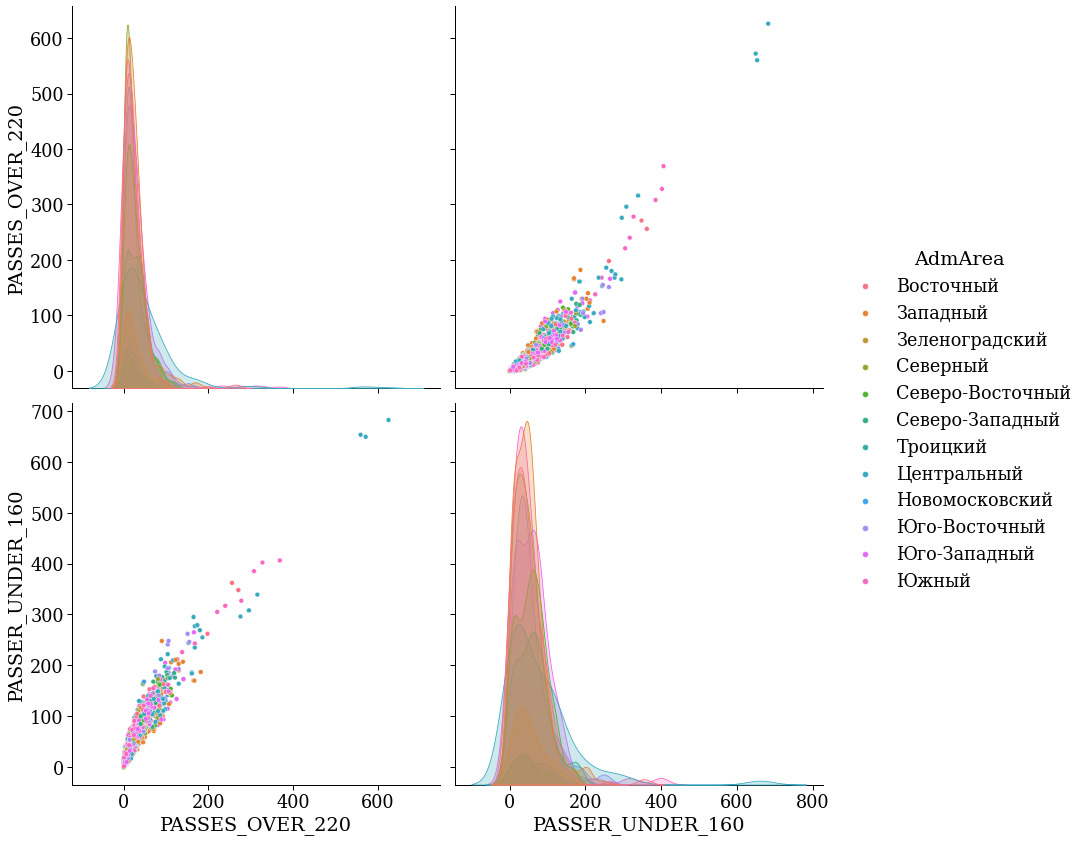

In [18]:
data1 = pd.DataFrame(data, columns=["PASSES_OVER_220", "PASSER_UNDER_160", "AdmArea"])
sns.pairplot(data1, hue="AdmArea", height=6)
plt.show()

Построим график jointplot для коррелирующих данных.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


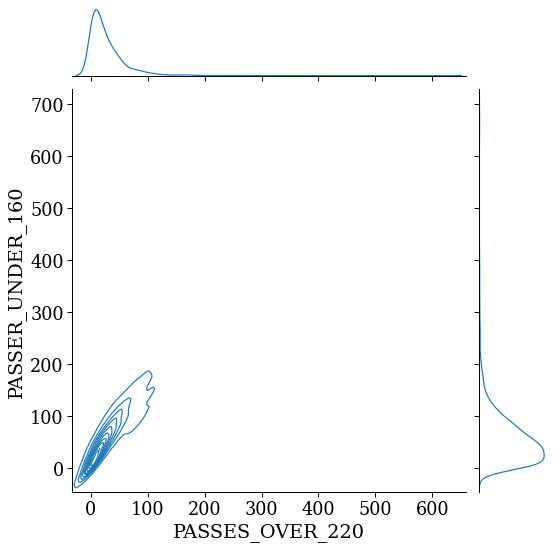

In [19]:
sns.jointplot("PASSES_OVER_220", "PASSER_UNDER_160", data, height=8, kind="kde")
plt.show()


Находим коэффициент корреляции этих серий данных, используя scipy.stats.pearsonr.

In [20]:
print (round(stats.pearsonr(data["PASSES_OVER_220"], data["PASSER_UNDER_160"])[0], 2))

0.94
